In [ ]:
# Implement line wrapping
from IPython.display import HTML, display
def set_css():
  display(HTML('''
  <Style>
    pre{
      white-space: pre-wrapped;
    }
  </Style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)

# **2.0 Data Cleaning**

In [241]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [242]:
# Import Dataset
titanic_df = pd.read_excel("/content/titanic3.xls")
titanic_df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [243]:
# Check number of rows and columns
titanic_df.shape

(1309, 14)

The pandas read_excel() method is used to import the titanic dataset as a data frame and store it in "titanic_df". It can also be observed from the head and shape output that the dataset has been properly imported.

## **2.1 Removing major errors, duplicates and outliers**

From the head output when inporting the dataset, it can be seen that the age column contains float values, which is innappropriate for detailing the age value.

In [244]:
# Handling major error
titanic_df["age"] = titanic_df["age"].round().astype(pd.Int64Dtype(), errors='ignore')
titanic_df["age"]

0         29
1          1
2          2
3         30
4         25
        ... 
1304      14
1305    <NA>
1306      26
1307      27
1308      29
Name: age, Length: 1309, dtype: Int64

The pandas round() and astype() methods were used to convert all float values to type int64 and round them to the nearest integer respectively. The parameter (errors = "ignore") was also included in the astype() method call to ignore null values.

As shown in the output above, the previously 0.9167 float value has been converted to the int value "1", as it is the nearest integer.

In [245]:
# Handle duplicates
duplicate_rows = titanic_df[titanic_df.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [pclass, survived, name, sex, age, sibsp, parch, ticket, fare, cabin, embarked, boat, body, home.dest]
Index: []


In [246]:
# Inspect column names to determine if there are
# any duplicate/redundant columns
titanic_df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,1,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


As shown from the output above, the duplicated() method was used to identify duplicate columns and it can determined from the empty dataframe returned that are no duplicate rows in the titanic dataset.

Furthermore, by checking the dataset itself from the head() output, it can be determined that there are no duplicate columns as all columns serve a unique purpose.

In [247]:
# Extracting outlier prone columns
outlier_col = ["sibsp", "parch", "age", "fare", "body"]

The numerical columns were extracted in order to facilitate the handling of outliers.

In [248]:
# Initializing list to store initial medians and STDs
old_median = []
old_std = []

In [249]:
# Checking for outliers
for c in outlier_col:
  median = titanic_df[c].median()
  std = titanic_df[c].std()
  old_median.append(median)
  old_std.append(std)
  outliers = (titanic_df[c] < (median - 2*std)) | (titanic_df[c] > (median + 2*std))
  print(outliers.value_counts())
print("Number of rows in dataset:", titanic_df.shape[0])

False    1252
True       57
Name: sibsp, dtype: int64
False    1172
True      137
Name: parch, dtype: int64
False    992
True      54
Name: age, dtype: Int64
False    1238
True       71
Name: fare, dtype: int64
False    1309
Name: body, dtype: int64
Number of rows in dataset: 1309


As shown in the code above, the numerical columns were iterated through and each of there row value were checked to see if they were within 2 standard deviations of the median value to determine and if they were not, this would mean that this value is an outlier and the row would be recognised as "True" in the "outliers" boolean set.

It can be observed from the output above that the sibsp, parch, age and fare columns contain outliers by the presence of True values from the value_counts() output.

In [250]:
# Replacing outlier values with median value
utlier_col = ["sibsp", "parch", "age", "fare"]
for c in outlier_col:
  median = titanic_df[c].median()
  std = titanic_df[c].std()
  lower = median - 2 * std
  upper = median + 2 * std
  titanic_df[c] = titanic_df[c].mask((titanic_df[c] < lower) | (titanic_df[c] > upper), median)


The mask() method was used to replace all values which are lower or greater than the lower and upper thresholds respectively from the "sibsp", "parch", "age" and "fare" columns.

In [251]:
# Checking if all outliers have been replaced
i = 0
for c in outlier_col:
  median = titanic_df[c].median()
  std = titanic_df[c].std()
  lower = old_median[i] - 2 * old_std[i]
  upper = old_median[i] + 2 * old_std[i]
  # outliers = titanic_df[c].notna().apply(lambda x: int(x) < (median - 2*std) or int(x) > (median + 2*std))
  outliers = (titanic_df[c] < lower) | (titanic_df[c] > upper)
  print(outliers.value_counts())
  i += 1
print("Number of rows in dataset:", titanic_df.shape[0])

False    1309
Name: sibsp, dtype: int64
False    1309
Name: parch, dtype: int64
False    1309
Name: age, dtype: Int64
False    1309
Name: fare, dtype: int64
False    1309
Name: body, dtype: int64
Number of rows in dataset: 1309


As shown from the output above, all outlier values have been replaced by their respective median value, indicated by the 1309 False values in each column.

## **2.2 Removing data points irrelevant to the analysis**

In [252]:
# Dropping irrelevant columns
titanic_df = titanic_df.drop(columns = ["name", "ticket", "body", "home.dest"])
titanic_df.columns

Index(['pclass', 'survived', 'sex', 'age', 'sibsp', 'parch', 'fare', 'cabin',
       'embarked', 'boat'],
      dtype='object')

As shown in the code above, the "name", "ticket", "body" and "home.dest" columns have been removed using the drop() method and are no longer present as shown in the columns attibute output.

## **2.3 Filling in missing data.**

In [253]:
# Handling missing values
# Identifying missing values
titanic_df.isna().sum()

pclass         0
survived       0
sex            0
age            0
sibsp          0
parch          0
fare           1
cabin       1014
embarked       2
boat         823
dtype: int64

As shown in the output above, there are quite a few missing values in the "age", "fare", "cabin", "embarked" and "boat" values.

In [254]:
# Extracting categorical and numerical columns
cat_col = ["cabin", "embarked", "boat"]
num_col = ["age", "fare"]

The categorical and numerical column names have been extracted to facilitate the data imputation process.

In [255]:
# Imputing numerical columns with mean value
for c in num_col:
  mean = titanic_df[c].mean()
  if (c == "age"):
    mean = round(mean)
  else:
    mean = f"{mean:.4f}"
  print("Imputing", c, "column with mean value:", mean)
  titanic_df[c].fillna(mean, inplace = True)

Imputing age column with mean value: 28
Imputing fare column with mean value: 22.7355


The numerical columns have been imputed with their respective mean values as it is a numerical column, for which the mean or median are generally the preferable option for imputation. The imputation was done using the pandas fillna() method and the mean value was calculated using the pandas mean() method.

In [256]:
# Imputing mode value in categorical columns
for c in cat_col:
  mode = titanic_df[c].mode().values[0]
  print("Imputing", c, "column with mode value:", mode)
  titanic_df[c].fillna(mode, inplace = True)

Imputing cabin column with mode value: C23 C25 C27
Imputing embarked column with mode value: S
Imputing boat column with mode value: 13


As for the categorical columns, they were imputed, using the pandas fillna() method, with their respective mode value, which was calculated using the pandas mode() method.

In [257]:
# Checking if all missing values have been handled
titanic_df.isna().sum()

pclass      0
survived    0
sex         0
age         0
sibsp       0
parch       0
fare        0
cabin       0
embarked    0
boat        0
dtype: int64

As shown in the isna().sum() method output above, there are no more missing values present in the dataset.

## **2.4 Handling imbalanaced dataset by sampling**

In [258]:
# Handling imbalanced dataset by sampling
from sklearn.utils import resample

In [259]:
# copying titanic_df
copy_df = titanic_df.copy()

In [260]:
majority_class = copy_df[copy_df['survived'] == 0]
minority_class = copy_df[copy_df['survived'] == 1]

# Oversample the minority class
oversampled_minority = resample(minority_class,
                                replace=True,  # With replacement
                                n_samples=len(majority_class),  # Match majority class size
                                random_state=42)  # Set a random state for reproducibility

# Combine the oversampled minority class with the majority class
sampled_df = pd.concat([majority_class, oversampled_minority])
# Shuffle the resulting datase
sampled_df = sampled_df.sample(frac=1, random_state=42)
sampled_df


,pclass,survived,sex,age,sibsp,parch,fare,cabin,embarked,boat
346,2,0,male,26,0,0,13.0,C23 C25 C27,S,13
863,3,0,male,28,0,0,7.8958,C23 C25 C27,S,13
492,2,1,male,1,0,0,37.0042,C23 C25 C27,C,10
986,3,0,male,22,0,0,7.125,C23 C25 C27,S,13
274,1,1,male,45,1,1,14.4542,E34,C,3
...,...,...,...,...,...,...,...,...,...,...
469,2,1,female,28,0,0,12.35,E101,Q,10
27,1,1,female,19,1,0,91.0792,B49,C,7
765,3,1,female,33,1,0,20.575,C23 C25 C27,S,10
913,3,1,male,21,0,0,7.7958,C23 C25 C27,S,13


In [261]:
sampled_df["survived"].value_counts()

0    809
1    809
Name: survived, dtype: int64

The resample() method from the sklearn.utils library was used to balance the dataset by over-sampling, i.e. matching the size of the minority class of the target variable, in that case "survived" to that of the majority class. As shown from the output above, the result is a dataset with a balanced distribution of passengers that survived and that have not, with 809 rows each.

# **3.0 Exploratory Analysis.**

## **3.1 Investigate the structure and shape of the dataset**

In [262]:
# Getting shape of dataset
sampled_df.shape

(1618, 10)

In [263]:
# Getting column names
sampled_df.columns

Index(['pclass', 'survived', 'sex', 'age', 'sibsp', 'parch', 'fare', 'cabin',
       'embarked', 'boat'],
      dtype='object')

From the shape attribute output above, it can be seen that the balanced dataset contains 1618 rows and 10 columns, the names of which are shown in the columns attribute output.

## **3.2 Exploring the variables**

In [264]:
# Getting distribution of each column
for c in sampled_df.columns:
  print(sampled_df[c].value_counts())

3    825
1    443
2    350
Name: pclass, dtype: int64
0    809
1    809
Name: survived, dtype: int64
male      950
female    668
Name: sex, dtype: int64
28    413
24     63
22     59
18     51
21     49
30     48
36     43
29     42
25     38
1      38
32     36
27     35
26     34
33     33
35     31
45     31
19     30
17     28
31     28
20     27
23     27
42     25
16     24
40     23
39     22
48     18
34     18
47     18
2      17
50     16
38     15
55     15
9      14
14     13
44     13
4      13
41     13
49     13
54     13
15     12
37     11
43     10
56      9
51      9
6       8
5       8
46      8
53      8
3       8
11      7
12      7
52      6
7       5
13      5
10      4
8       4
0       2
Name: age, dtype: Int64
0    1150
1     419
2      49
Name: sibsp, dtype: int64
0    1380
1     238
Name: parch, dtype: int64
14.4542    106
8.0500      75
13.0000     69
7.7500      67
26.0000     65
          ... 
25.9250      1
8.4042       1
9.2167       1
45.5000      1
3

Using the pandas value_counts() method, the distribution of each variable in their respective columns can be outputted.

Due to the sampling, the "survived" column is perfectly balanced while the "pclass" and "sex" columns are mildly balanced, with none of the variables extremely exceeding the others in frequency.

On other hand, it seems that the distribution of the other columns are heavily imbalanced as each column has that one variable which makes up for most of the distribution while the frequency of some other variables in the same column pales in comparison.

## **3.3 Visualize the passenger age groups.**

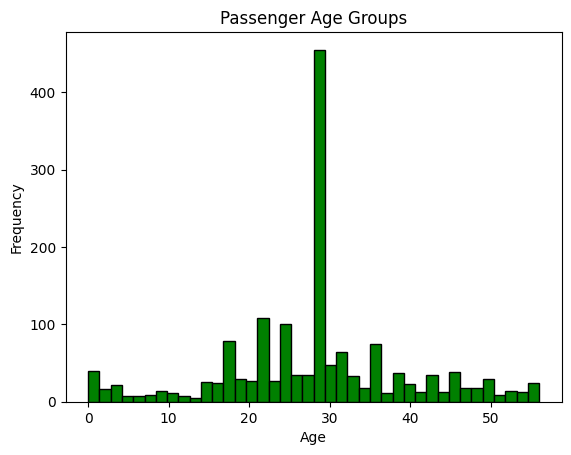

In [265]:
# Visualizing age groups as a histogram
plt.hist(sampled_df["age"], bins = 40, color = "green", edgecolor = "black")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Passenger Age Groups")
plt.show()

The matplotlib hist() method was used to create a histogram to visualize the passengers' age frequency distribution and it can be observed that the most common age is around 32, with almost 400 of the passengers belonging to that age group.

## **3.4 Visualize the distribution of passengers across the different classes.**

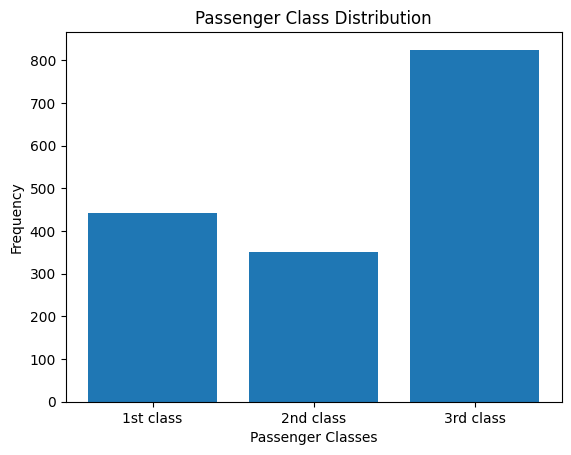

In [266]:
# Visualize number of passengers per class as a bar chart
categories = ["1st class", "2nd class", "3rd class"]
plt.bar(categories, sampled_df["pclass"].value_counts().sort_index())
plt.xlabel("Passenger Classes")
plt.ylabel("Frequency")
plt.title("Passenger Class Distribution")
plt.show()

The matplotlib bar() method was used to contruct the bar chart to display the distribution of passengers across the different classes.

It can be observed from the bar chart that almost half of the passengers were in 3rd class, with the majority of the remaining passengers in 1st class.

## **3.5 Exploring the survival rate for any gender-based pattern.**

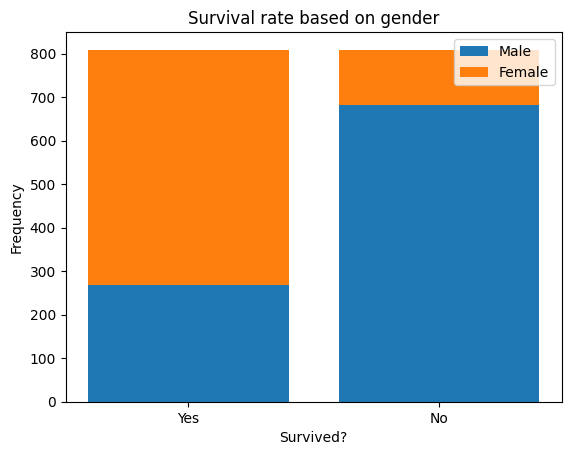

In [267]:
# Stacked bar chart to visualize survival rate by gender
survived_male = sampled_df[(sampled_df["sex"] == "male") & (sampled_df["survived"] == 1)]
not_survived_male = sampled_df[(sampled_df["sex"] == "male") & (sampled_df["survived"] == 0)]
survived_female = sampled_df[(sampled_df["sex"] == "female") & (sampled_df["survived"] == 1)]
not_survived_female = sampled_df[(sampled_df["sex"] == "female") & (sampled_df["survived"] == 0)]

categories = ["Yes", "No"]
male_values = [len(survived_male), len(not_survived_male)]
female_values = [len(survived_female), len(not_survived_female)]

plt.bar(categories, male_values, label = "Male")
plt.bar(categories, female_values, bottom = male_values, label = "Female")

plt.xlabel("Survived?")
plt.ylabel("Frequency")
plt.title("Survival rate based on gender")
plt.legend()
plt.show()

The matplotlib bar() method was used to construct the bar chart and was made into a stacked bar chart by including the "bottom" parameter when adding the second set of values to stack it onto the previous set.

As shown in the stacked barchart above, the survivors are majorly made up of female passengers while it is the opposite for the non-survivors, with an even bigger discrepancy between the number of male and femal passengers.

## **3.6 Visualize the percentage of passengers from each embarkation port.**

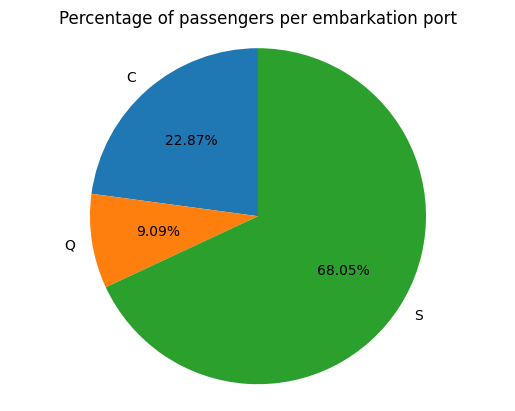

In [268]:
# Visualizing the passengers based on embarkation port as a pie chart
labels = np.sort(sampled_df["embarked"].unique())
sizes = sampled_df["embarked"].value_counts().sort_index()

plt.pie(sizes, labels = labels, autopct="%1.2f%%", startangle = 90) # autopct is to format percentage display
plt.title("Percentage of passengers per embarkation port")
plt.axis("equal") # To ensure the pie is drawn as a circle
plt.show()

The matplotlib pie() method was used to construct the pie chart to visualize the percentage of passengers who embarked at each port.

It can be observed from the pie chart that 68.05% of the passengers embarked at port S, 22.87% at port C and the rest at port Q.

## **3.7 Investigating the relationship between the boat the passengers took and their survival status**

In [269]:
# Initialize category list
categories = []
values_list = []

In [270]:
# Extracting the survivor and non-survivor rows per boat
for cat in np.sort(sampled_df["boat"].unique().astype(str)):
  categories.append(cat)
  survived = sampled_df[(sampled_df["boat"] == cat) & (sampled_df["survived"] == 1)]
  not_survived = sampled_df[(sampled_df["boat"] == cat) & (sampled_df["survived"] == 0)]
  values = [len(survived), len(not_survived)]
  values_list.append(values)

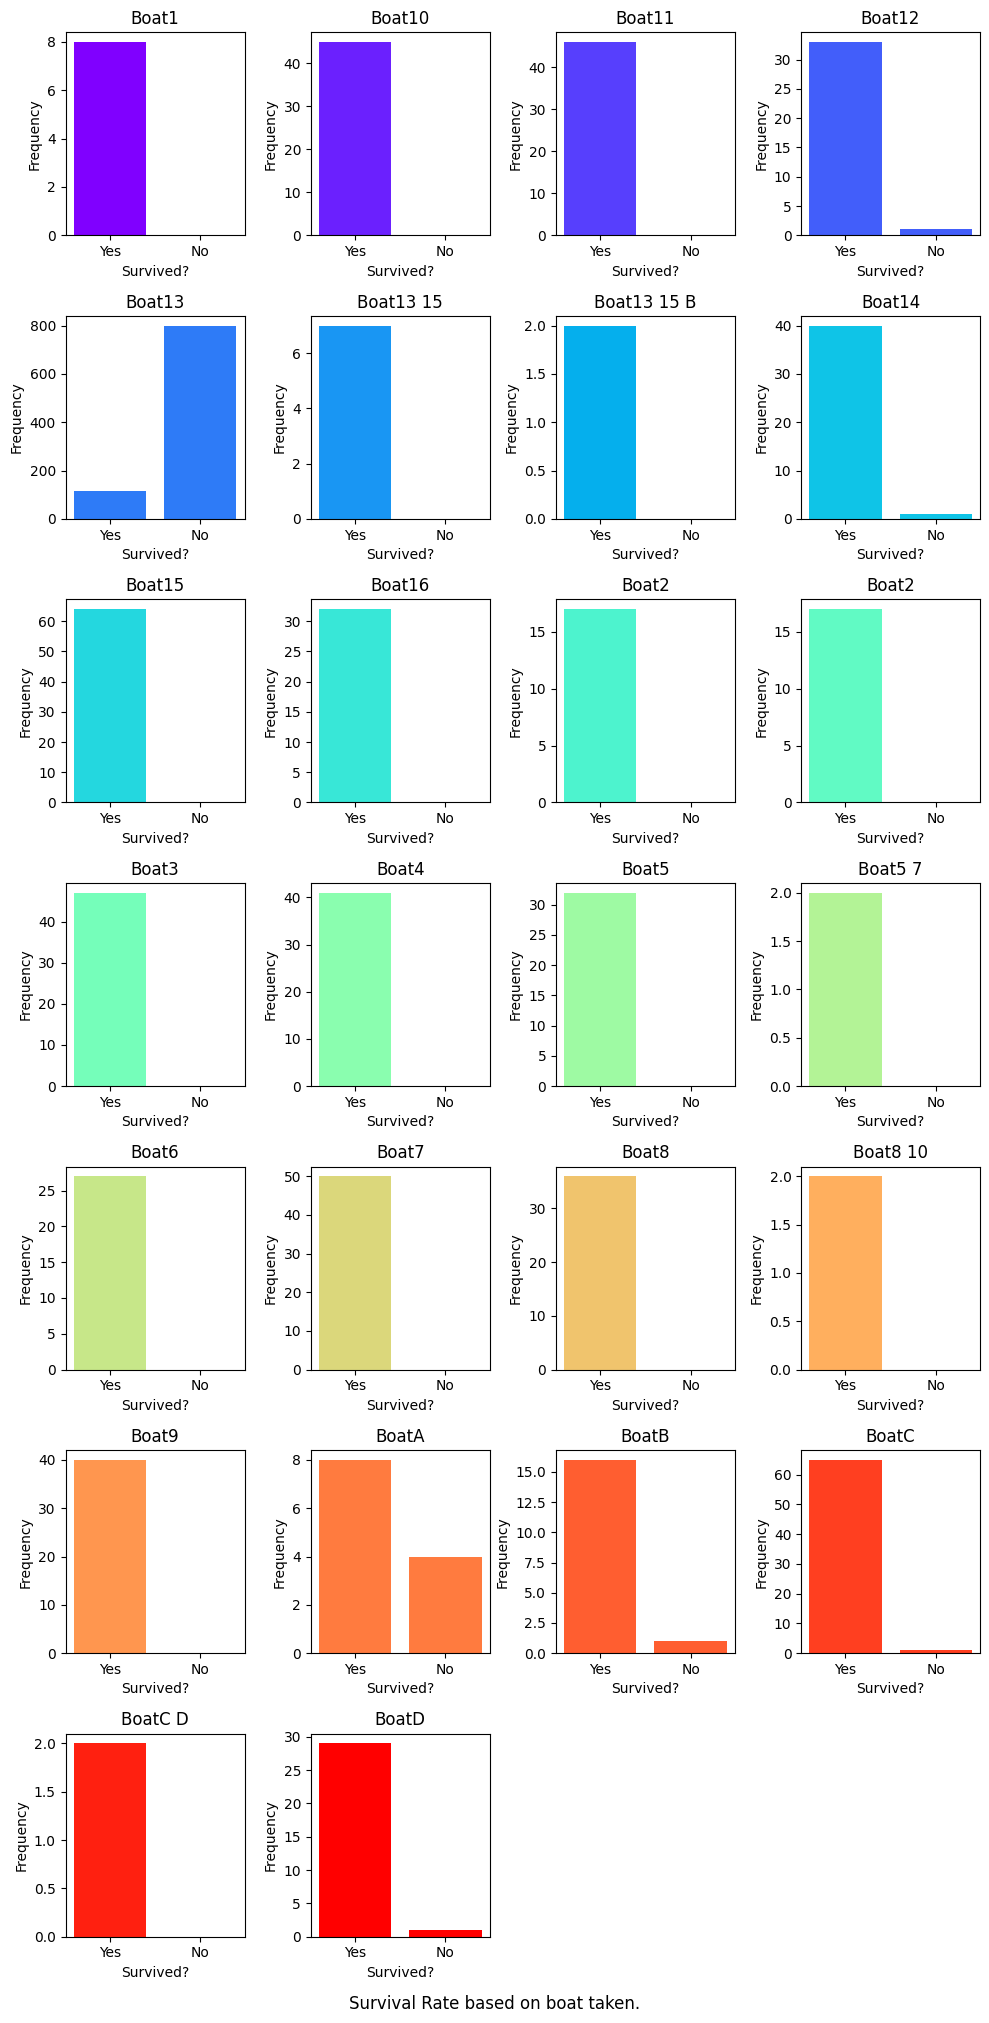

In [271]:
# Subplots bar chart to visualize survival rate based on boat taken
survived_cat = ["Yes", "No"]
color_map = plt.get_cmap("rainbow", 26)

fig, axs = plt.subplots(nrows=7, ncols=4, figsize=(10, 20))
axs = axs.flatten()

for i in range(len(categories)):
    ax = axs[i]  # Select the current subplot
    ax.bar(survived_cat, values_list[i], color=color_map(i))
    ax.set_title("Boat" + categories[i])  # Set the title for each subplot
    ax.set_xlabel("Survived?")
    ax.set_ylabel("Frequency")

for j in range(len(categories), len(axs)):
    fig.delaxes(axs[j])

fig.tight_layout()
plt.suptitle("Survival Rate based on boat taken.", y = 0)
plt.show()

A collection of bar subplots was created using the matplotlib subplots() and bar() methods to visulaize the number of survivors and deaths per boat. Additionally, the color each graph was set using the colormap object with 26 colours from its "rainbow" collection.

As observed from each boat's bar chart, most boast have an overwhelming survival rate compared to its death rate, with some even having a 0% death rate while the Boat 13 has an overwhelming death rate, almost accounting for all the deaths overall, with the remaining deaths scattered in samll amounts among the other boats.

## **3.8 Investigating the relationship between the passengers' cabin and their survival status.**

In [272]:
# Initialize category list
categories = []
values_list = []

In [273]:
# Extracting the survivor and non-survivor rows per cabin
for cat in np.sort(sampled_df["cabin"].unique().astype(str)):
  categories.append(cat)
  survived = sampled_df[(sampled_df["cabin"] == cat) & (sampled_df["survived"] == 1)]
  not_survived = sampled_df[(sampled_df["cabin"] == cat) & (sampled_df["survived"] == 0)]
  values = [len(survived), len(not_survived)]
  values_list.append(values)

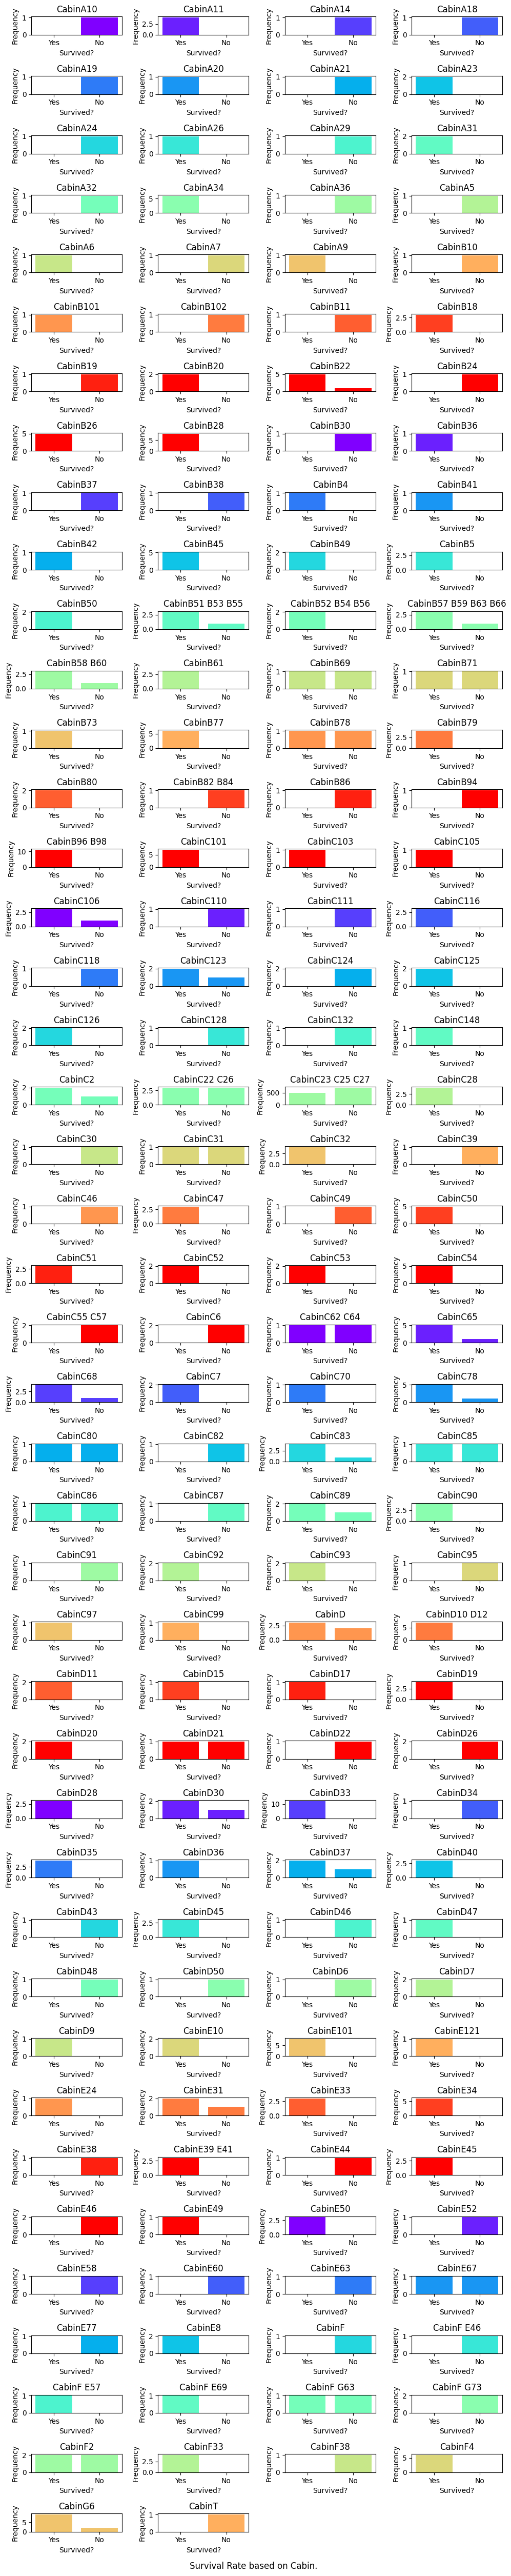

In [274]:
# Subplots bar chart to visualize survival rate based on cabin
survived_cat = ["Yes", "No"]
color_map = plt.get_cmap("rainbow", 26)

fig, axs = plt.subplots(nrows=43, ncols=4, figsize=(10, 50))
axs = axs.flatten()

c = 0
for i in range(len(categories)):
    ax = axs[i]  # Select the current subplot
    ax.bar(survived_cat, values_list[i], color=color_map(c))
    ax.set_title("Cabin" + categories[i])  # Set the title for each subplot
    ax.set_xlabel("Survived?")
    ax.set_ylabel("Frequency")
    c+=1
    if (c == 30):
      c = 0

for j in range(len(categories), len(axs)):
    fig.delaxes(axs[j])

fig.tight_layout()
plt.suptitle("Survival Rate based on Cabin.", y = 0)
plt.show()

Similarly to how the investigation for the survival rate based on boat taken was carried out, the relationship between the passenger's cabin and their survival status is investigated using a subplot of bar charts, one for each cabin detailing their respective number of survivors and death.

It can be observed from the collection of bar chart the cabins in the "B" section generally yield more survivors per cabin in comparison to the other sections. However, it can also be observed that a mojority of the survivors and deaths come from the cabins "C23 C25 C27", with survival count of around 500 and death count of around 800, however, that may be due to the data imputation carried previously as the cabin column contained majorly missing values.

## **3.9 Visualize the correlation of age and fare using a scatter plot.**

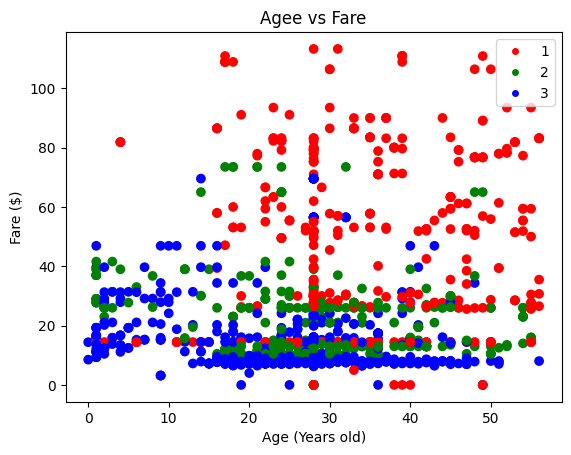

In [277]:
category = sampled_df["pclass"]
# Color coding the dots per passenger class
color_map = {1: 'red', 2: 'green', 3: 'blue'}
colors = [color_map[cat] for cat in category]
# Scatter plot with age vs fare
plt.scatter(sampled_df["age"], sampled_df["fare"], c = colors)
plt.xlabel("Age (Years old)")
plt.ylabel("Fare ($)")
plt.title("Agee vs Fare")
# Setting the elements for the legend
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=cat, markerfacecolor=color)
                   for cat, color in color_map.items()]
plt.legend(handles=legend_elements)
plt.show()

The matplotlib scatter() method was used to create a scatter plot of the age of the passengers vs the fare paid and the "c" parameter of the scatter() method was set to "colors", which maps the colors red, green and blue to 1,2 and 3 respectively, in order to color code the dots by passenger class.

It can be observed from the scatter plot above that the age of the passengers in the 1st class is slightly concentrated around the 28-29 range while the 2nd class and 3rd class passengers' age is concentrated around the 17-49 and 11-53 range respectively, few few data points scattered around the overall age range in all columns.

## **3.10 Visualizing the fares per passenger class as a box plot.**

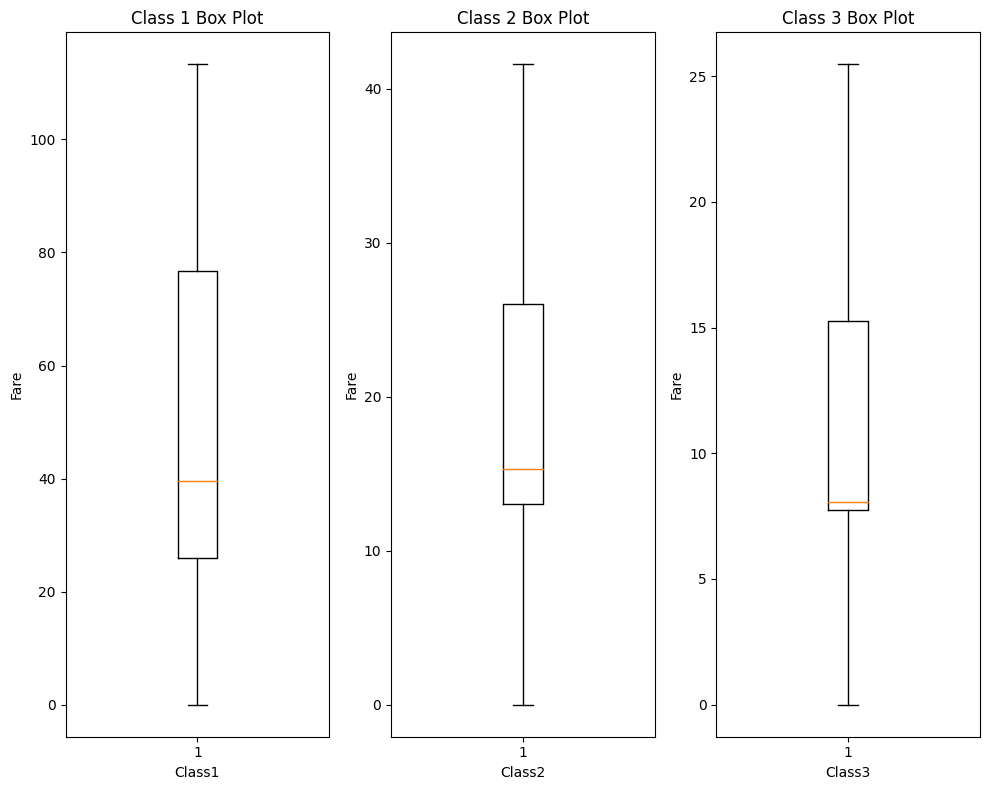

In [301]:
# boxplot of fares by passenger class
fare_1 = sampled_df[(sampled_df["pclass"] == 1)]["fare"]
fare_2 = sampled_df[(sampled_df["pclass"] == 2)]["fare"]
fare_3 = sampled_df[(sampled_df["pclass"] == 3)]["fare"]
fare_1 = pd.to_numeric(fare_1, errors="coerce")
fare_2 = pd.to_numeric(fare_2, errors="coerce")
fare_3 = pd.to_numeric(fare_3, errors="coerce")
data = [fare_1, fare_2, fare_3]

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(10, 8))
axs = axs.flatten()

for i, d in enumerate(data):
  axs[i].boxplot(d, showfliers = False)
  axs[i].set_xlabel("Class" + str(i+1))
  axs[i].set_ylabel('Fare')
  axs[i].set_title("Class " + str(i+1) + ' Box Plot')
plt.tight_layout()
plt.show()

A collection of box plots, one for each passenger class, was created using the matplotlib subplots() and boxplot() methods and the boxplot()'s parameter "showfliers" was set to false since, even tho the outliers were previously replaced by the median value, the standard deviation and thus the thresholds of the column will change due to the new distribution, thus introducing the chance for new outliers to emerge.

As shown in by the box plots above, the fare of the 1st, 2nd and 3rd class extends up to over $$100 and $40 and $25 respectively, with all 3 distributions being skewed towards the upper end of the fare distribution.

## **3.11 Visualizing the distribution of age based on sex using a violin plot.**

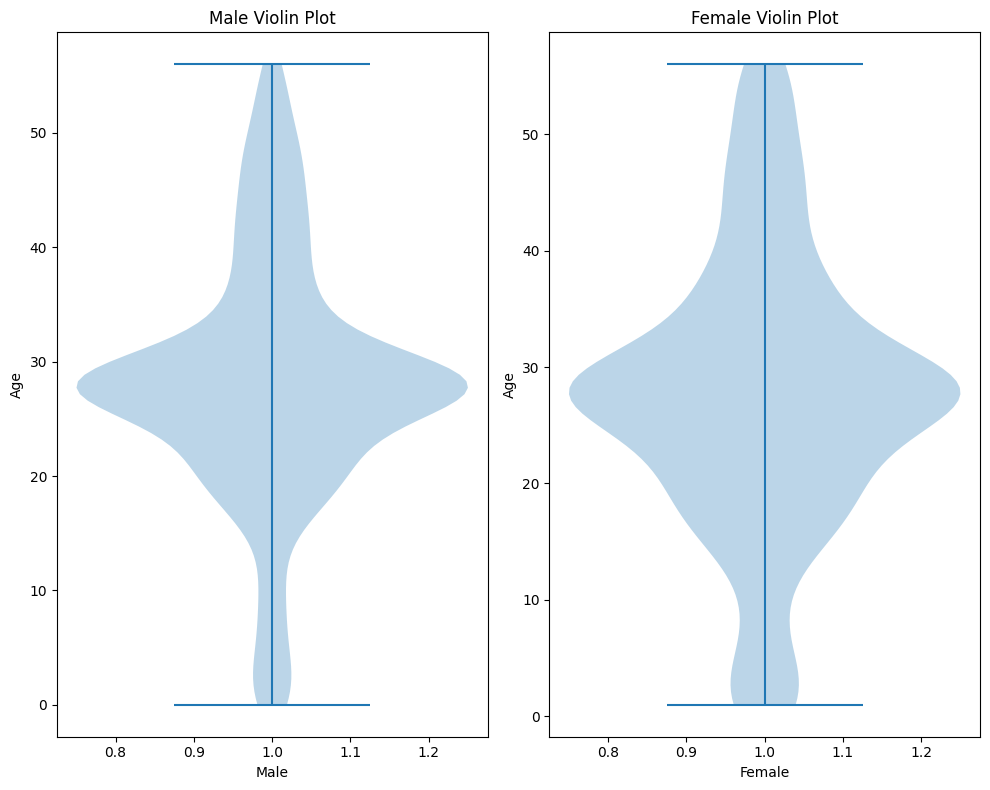

In [306]:
# Violin plot to display age distribution based on sex
male_age = sampled_df[(sampled_df["sex"] == "male")]["age"].to_list()
female_age = sampled_df[(sampled_df["sex"] == "female")]["age"].to_list()
age_data = [male_age, female_age]
categories = ["Male", "Female"]

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 8))
axs = axs.flatten()

for i, d in enumerate(age_data):
  axs[i].violinplot(d)
  axs[i].set_xlabel(categories[i])
  axs[i].set_ylabel('Age')
  axs[i].set_title(categories[i] + ' Violin Plot')
plt.tight_layout()
plt.show()


The matplotlib violinplot() method was used to create a violin plot to represent the age distribution based on the sex of the passengers.

It can be observed from the violin plot that there is a very high probability of male passengers to be in their late 20s while the female passengers are in the same situation but their age vary a bit more in the late 20s range than for the male passengers.

## **3.12 Visualizing the correlation between numeric variables in a dataset using a Seaborn heatmap.**

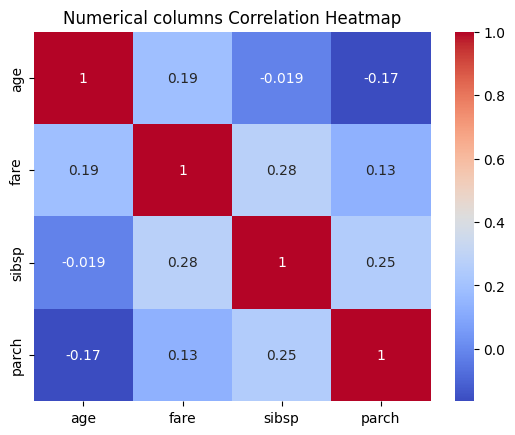

In [319]:
# Seaborn Heatmep to represent correlation between numerical values
temp_df = sampled_df.copy()
temp_df["fare"] = pd.to_numeric(temp_df["fare"], errors="coerce").round()
heatmap_data = temp_df[["age", "fare", "sibsp", "parch"]]
correlation_matrix = heatmap_data.corr()  # Compute the correlation matrix
sb.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Numerical columns Correlation Heatmap")
plt.show()

The seaborn heatmap() method was used to visulaize the numerical columns as a heatmap while the corr() method was used to calculate the correlation between each variable combination.

It can be observed from the heatmap above that most variable combination have a weak positive correlation. between them except for the (age, sibsp) and (age, parch) combinations which demonstrate a weak negative correlation.